In [1]:
import sys
import time
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter

In [2]:
DCT = pd.read_excel("Raw_Results/RESULTS_IEEE57_ClassifiersTest_Imbalanced2_DCT.xlsx")
GNB = pd.read_excel("Raw_Results/RESULTS_IEEE57_ClassifiersTest_Imbalanced2_GNB.xlsx")
KNN = pd.read_excel("Raw_Results/RESULTS_IEEE57_ClassifiersTest_Imbalanced2_KNN.xlsx")

In [3]:
imbalanceRange = np.arange(0.1,1.0,0.1)
print(imbalanceRange)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [4]:
DCT = []
GNB = []
KNN = []
MM = []

for i in imbalanceRange:
    DCT.append( pd.read_excel("Raw_Results/RESULTS_IEEE57_ClassifiersTest_Imbalanced2_DCT.xlsx", sheet_name = "Imb {}".format(i)) )
    GNB.append( pd.read_excel("Raw_Results/RESULTS_IEEE57_ClassifiersTest_Imbalanced2_GNB.xlsx", sheet_name = "Imb {}".format(i)) )
    KNN.append( pd.read_excel("Raw_Results/RESULTS_IEEE57_ClassifiersTest_Imbalanced2_KNN.xlsx", sheet_name = "Imb {}".format(i)) )
    MM.append ( pd.read_excel("Raw_Results/RESULTS_IEEE57_MainModels_Imbalanced2_100Epochs.xlsx", sheet_name = "Imb {}".format(i)) )

In [5]:
DCT[0].head()

,Unnamed: 0,Sparsity,Accuracy,F1 score,Precision,Recall,False Positive Rate
0,0,0.1,0.4945,0.661079,0.497226,0.986,0.997
1,1,0.2,0.4980,0.664214,0.498995,0.993,0.997
2,2,0.3,0.5710,0.694227,0.539313,0.974,0.832
3,3,0.4,0.5410,0.680807,0.521855,0.979,0.897
4,4,0.5,0.4995,0.664657,0.499748,0.992,0.993


In [6]:
d1 = DCT[0]
d1['Accuracy']

0    0.4945
1    0.4980
2    0.5710
3    0.5410
4    0.4995
5    0.5005
6    0.4845
7    0.5015
8    0.4985
9    0.9880
Name: Accuracy, dtype: float64

In [7]:
dct_acc = []
gnb_acc = []
knn_acc = []
ann_acc = []
gdnn_acc = []

for i in range(9):
    dct = DCT[i]
    gnb = GNB[i]
    knn = KNN[i]
    ann = MM[i]
    
    dct_acc.append( np.mean(dct['Accuracy']) )
    gnb_acc.append( np.mean(gnb['Accuracy']) )
    knn_acc.append( np.mean(knn['Accuracy']) )
    ann_acc.append( np.mean(ann['Model 1'])  ) 
    gdnn_acc.append( np.mean(ann['Model 7'])  )

In [8]:
print(dct_acc)
print(gnb_acc)
print(knn_acc)
print(ann_acc)
print(gdnn_acc)

[0.5577, 0.5199, 0.6460000000000001, 0.4990999999999999, 0.5244, 0.54375, 0.51165, 0.5515000000000001, 0.49939999999999996]
[0.7401, 0.728, 0.7083, 0.6673, 0.62115, 0.60555, 0.61855, 0.6214999999999999, 0.6026]
[0.7377499999999999, 0.78425, 0.8191, 0.8269499999999999, 0.8387500000000001, 0.8734999999999999, 0.8825000000000001, 0.8954000000000001, 0.8999500000000001]
[0.841550013422966, 0.8722500085830689, 0.8944000005722046, 0.8734499990940094, 0.9139500111341476, 0.9009999990463257, 0.8923500001430511, 0.8777999997138977, 0.8848499983549118]
[0.9078500062227249, 0.9191000074148178, 0.9175000041723251, 0.914150008559227, 0.8984499990940094, 0.9138999968767166, 0.9108500003814697, 0.9006499916315078, 0.9225500017404556]


In [9]:
x=np.arange(0.1,1,0.1)
x=x/2
print(x)

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45]


## Plotting

In [10]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
title_font = {'fontname':'Arial', 'size':'26', 'color':'black', 'weight':'bold',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

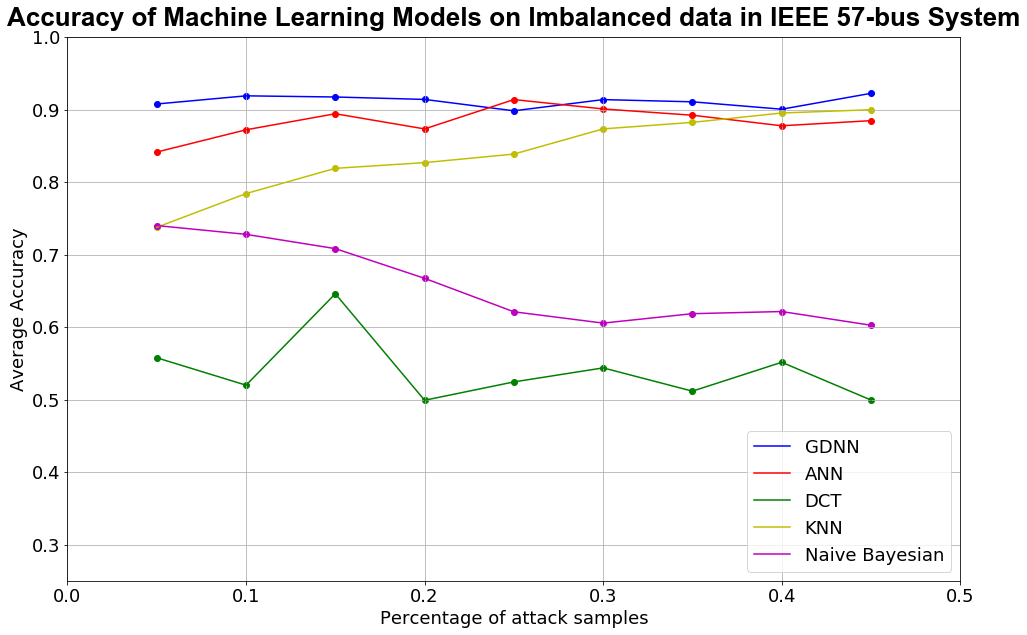

In [11]:
plt.figure(figsize=(16,10))
plt.scatter(x,gdnn_acc, color = 'b')
plt.plot(x,gdnn_acc, 'b-', label="GDNN")

plt.scatter(x,ann_acc, color = 'r')
plt.plot(x,ann_acc, 'r-', label="ANN")

plt.scatter(x,dct_acc, color = 'g')
plt.plot(x,dct_acc, 'g-', label="DCT")

plt.scatter(x,knn_acc, color = 'y')
plt.plot(x,knn_acc, 'y-', label="KNN")

plt.scatter(x,gnb_acc, color = 'm')
plt.plot(x,gnb_acc, 'm-', label="Naive Bayesian")

plt.ylabel('Average Accuracy')
plt.xlabel('Percentage of attack samples')
plt.legend(loc="lower right")
plt.axis([0,0.5,0.25,1])

plt.title('Accuracy of Machine Learning Models on Imbalanced data in IEEE 57-bus System', **title_font)
plt.grid()
plt.savefig('IEEE57_ImbalancedAccuracies.png')

plt.show()